### IMDB

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

In [4]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/home/jupyter/.fastai/data/imdb_sample/data_save.pkl')]

In [5]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [6]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [7]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [8]:
data_lm.save()

In [9]:
data = load_data(path)

### Tokenization

In [10]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [11]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [12]:
data.train_ds[0][0]

Text xxbos i thought the original of this film was quaint and charming as well as having me sitting on the edge of my seat trying to figure it out . 
 
  xxmaj since i had already seen the original , when i saw this on xxmaj sci xxmaj fi xxmaj xxunk i do n't know if this remake was deliberately made for xxmaj sci xxmaj fi - i knew what it was within the first few minutes . xxmaj since i like xxmaj richard xxmaj burgi as a character actor , i wanted to see how he would pull it off . 
 
  xxmaj the writers / producers etc , xxunk the film a bit by trying to explain the plight of the " aliens " ( xxmaj they could no longer xxunk their own kind and needed help ) using the same pseudo science that has been xxunk in our ears in the 90 's . xxmaj maybe it added a bit of polish to the film , or not . 
 
  xxmaj this film . xxmaj film ? xxmaj this production takes on a more sinister edge than the original xxunk xxmaj the original ended with a confrontation between the young woman and the alien 

In [13]:
data.train_ds[0][0].data[:10]

array([   2,   18,  202,    8,  228,   13,   20,   31,   25, 4673])

### With the data block API

In [14]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
       .split_from_df(col=2)
       .label_from_df(cols=0)
       .databunch())

### Language model

In [15]:
bs = 48

In [16]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm')]

In [17]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/labeledBow.feat')]

In [18]:
(path/'train'/'pos').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/3006_9.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/1441_9.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/6778_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/8899_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/3351_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/4862_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/3173_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/1157_10.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/466_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/1376_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/10861_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/2206_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/2198_8.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/pos/4187_7.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tra

In [19]:
(path/'test').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/test/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test/labeledBow.feat')]

In [20]:
(path/'unsup').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/unsup/20150_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/19796_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/47134_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/37222_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/2343_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/20943_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/19988_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/37892_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/36167_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/7143_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/49429_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/22543_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/8520_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/41712_0.txt'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup/28927_0.txt'),
 PosixPath('/home/jupyter/.f

### Fine tune language model to reviews English

In [22]:
data_lm = (TextList.from_folder(path)
          .filter_by_folder(include=['train', 'test', 'unsup'])
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [23]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [24]:
data_lm.show_batch()

idx,text
0,". xxmaj and to make things worse , they have n't got any customers ( as their former boss predicted ) . xxmaj when the man pays them a visit in their shop , he challenges them to provide the meat for a dinner party he organizes . \n \n xxmaj than a tragic accident happens . xxmaj one of the butchers locks the electrician into the freezing chamber"
1,"by a delirious professor , xxmaj stacey xxmaj keach , and his half - wit assistance , xxmaj ted xxmaj raimi . xxmaj the film is pure b movie gold and its great to see xxmaj keach and ram up on screen with xxmaj bruce , and the fact that a lot of the film works purely on xxmaj bruce 's comic slapstick acting is what make it hilarious ,"
2,"xxmaj oh , i ca n't forget about the stripper , he was so find , and i did n't know if i should cover my eyes or smile while i watch him reveal his sexiness on the big screen . xxmaj damn ! he was fine ! xxmaj tangi looked flawless , and sexy , and she stepped up a notch since xxmaj felicity . xxmaj over all the"
3,"adentro last xxmaj friday , and i am still shocked by its beauty , the powerful work of every single actor and actress and xxmaj amenabar 's unbelievable ability to narrate the story of xxmaj ramón xxmaj sampedro , who was well known in xxmaj spain for asking for a legal euthanasia , lost the court cause , and eventually died in front of a camera drinking a glass with"
4,"league with "" xxmaj plan 9 xxmaj from xxmaj outer xxmaj space "" . xxmaj the dialog is suspect ( but the xxmaj xxunk is quite enjoyable ... ) , the plot is not quite believable , xxmaj gavin 's character overacts excessively . xxmaj while watching the movie , somethings happen that truly make you wonder ... xxmaj handsome and xxmaj kim making out on a tank , xxmaj"


In [25]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


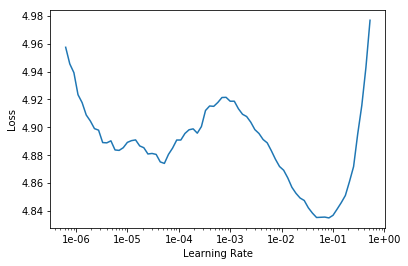

In [ ]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8, 0.7))

In [ ]:
learn.save('fine_tuned')

In [ ]:
learn.load('fine_tuned')

In [ ]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In [ ]:
learn.save_encoder('fine_tuned_enc')

### Classifier

In [ ]:
path = untar_data(URLs.IMDB)

In [ ]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
            .split_by_folder(valid='test')
            .label_from_folder(classes=['neg', 'pos'])
            .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [ ]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [ ]:
data_clas.show_batch()

## Create Model

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0,7))

In [ ]:
learn.save('first')

In [ ]:
learn.load('first')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms=(0.8, 0.7))

In [ ]:
learn.save('second')

In [ ]:
learn.load('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4), 5e-3), moms=(0.8, 0.7))

In [ ]:
learn.save('third')

In [ ]:
learn.load('third')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

In [ ]:
learn.predict("I really loved that movie, it was awesome!")